In [18]:
# Set Working Directory
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Importing the dataset
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/files/name_gender_dataset.csv")
print("Input Data and Shape")
print(data.shape)
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Input Data and Shape
(147269, 4)


,Name,Gender,Count,Probability
0,James,M,5304407,0.014517
1,John,M,5260831,0.014398
2,Robert,M,4970386,0.013603
3,Michael,M,4579950,0.012534
4,William,M,4226608,0.011567


In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["Gender"] = le.fit_transform(data["Gender"])
data["Name"] = le.fit_transform(data["Name"])
data

,Name,Gender,Count,Probability
0,52308,1,5304407,1.451679e-02
1,57879,1,5260831,1.439753e-02
2,102035,1,4970386,1.360266e-02
3,84621,1,4579950,1.253414e-02
4,128418,1,4226608,1.156713e-02
...,...,...,...,...
147264,133797,1,1,2.736740e-09
147265,133823,1,1,2.736740e-09
147266,133843,1,1,2.736740e-09
147267,133892,1,1,2.736740e-09


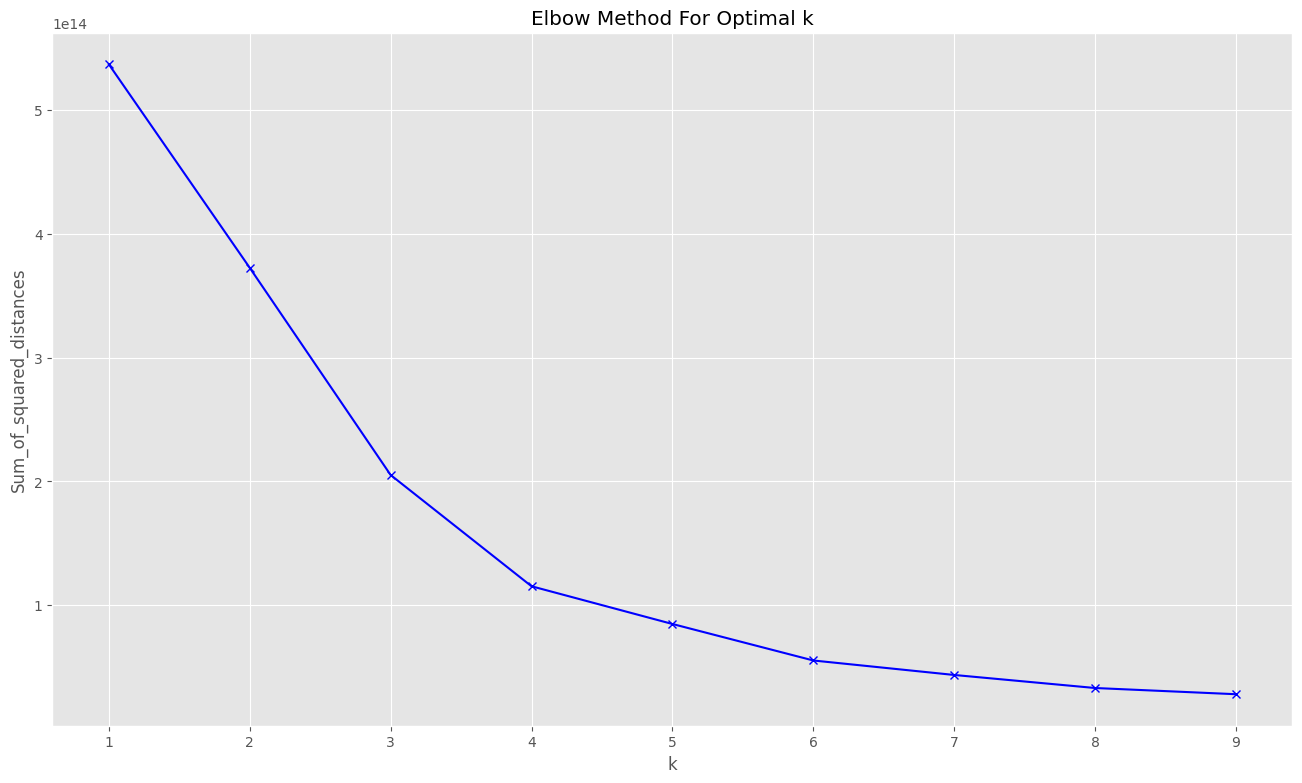

In [20]:
# Implement the algorithm using scikit-learn
from sklearn.cluster import KMeans

K = range(1, 10)
sum_of_squared_distances = []

for k in K:
  kmeans = KMeans(n_clusters = k, init= "k-means++", n_init= "auto", max_iter= 300, tol= 0.0001, verbose= 0, random_state= None, copy_x= True, algorithm= "lloyd")
  kmeans = kmeans.fit(data)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [21]:
k = 4
kmeans = KMeans(n_clusters = k, init= "k-means++", n_init= "auto", max_iter= 300, tol= 0.0001, verbose= 0, random_state= None, copy_x= True, algorithm= "lloyd")

kmeans.fit(data)

centroids = kmeans.cluster_centers_

labels = kmeans.labels_

print(centroids)
print(labels)
label = kmeans.fit_predict(data)
print(label)

[[3.35380485e+04 4.08338750e-01 1.45207601e+03 3.97395547e-06]
 [1.00345370e+05 3.72439504e-01 1.14369796e+03 3.13000491e-06]
 [7.62497273e+04 9.09090909e-01 3.85892027e+06 1.05608644e-02]
 [5.91795330e+04 4.50549451e-01 7.25090132e+05 1.98438369e-03]]
[2 2 2 ... 1 1 1]
[3 3 3 ... 0 0 0]


In [24]:
data2 = pd.DataFrame(label)
#data3 = [data ,data2]
#header = ['', 'label']
diffrence = pd.concat([data,data2])
diffrence.to_csv('name_gender.csv',index=False)